In [37]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
import os

import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd



%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [24]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
624,4139219.2,08_10_2018,1,TwoTower_noTimeout,63,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.2\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
626,4139219.2,08_10_2018,3,TwoTower_noTimeout,29,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.2\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
664,4139219.2,10_10_2018,2,TwoTower_noTimeout,86,1,CA1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139219.2\10_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\10_10_2...
702,4139219.2,12_10_2018,1,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139219.2\12_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\12_10_2...
748,4139219.2,15_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139219.2\15_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\15_10_2...
797,4139219.2,17_10_2018,6,TwoTower_Timeout,53,1,CA1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139219.2\17_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\17_10_2...
836,4139219.2,19_10_2018,1,TwoTower_Timeout,38,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.2\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
838,4139219.2,19_10_2018,3,TwoTower_Timeout,47,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.2\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\19_10_2...
853,4139219.2,20_10_2018,3,TwoTower_Timeout,52,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.2\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\20_10_2...
871,4139219.2,22_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139219.2\22_10_...,G:\My Drive\2P_Data\TwoTower\4139219.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.2\22_10_2...


In [25]:
sess = df_mouse.iloc[10]

In [26]:
VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
cmax = np.max(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds)



speed_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(VRDat.speed._values,VRDat.pos._values,tstart_inds, teleport_inds)

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0
(601,)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:250: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:251: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [27]:
speed_dict = u.trial_type_dict(speed_trial_mat,trial_info['morphs'])

(40, 70)

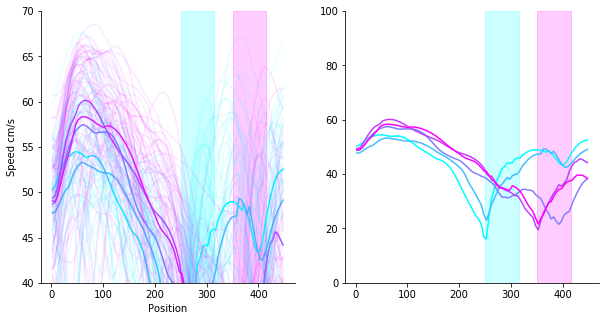

In [31]:
f,ax=b.plot_speed(centers,speed_dict,trial_info['morphs'])
ax[0].set_ylim([40,70])

In [13]:
print(VRDat.columns)

Index(['time', 'pos', 'dz', 'morph', 'lick', 'reward', 'tstart', 'teleport',
       'clickOn', 'towerJitter', 'wallJitter', 'bckgndJitter', 'speed',
       'lick rate', 'ca inds', 'trial number'],
      dtype='object')


In [33]:
# get rewarded trials
pcnt = u.correct_trial_mask(trial_info['rewards'],tstart_inds,teleport_inds,VRDat.shape[0])

# get lick positions
lick_positions = u.lick_positions(VRDat['lick']._values,VRDat['pos']._values)


In [34]:
inds0 = (VRDat['morph']==0) & (VRDat['pos']>0)  & (pcnt>0)
inds1 = (VRDat['morph']==1) & (VRDat['pos']>0)  & (pcnt>0)

In [83]:
XX_I0, xbins = bd.transition_prob_matrix(VRDat.pos[inds0],binsize=5,sig=4)
XX_I1, xbins = bd.transition_prob_matrix(VRDat.pos[inds1],binsize=5,sig=4)
pos_binned = np.digitize(VRDat['pos']._values,xbins,right=True)

In [88]:
LLR_XX = np.zeros([VRDat.shape[0],])
LI0_XX = np.zeros([VRDat.shape[0],])
LI1_XX = np.zeros([VRDat.shape[0],])
for t, (start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    LLR_XX[start+1:stop]=np.log(XX_I0[pos_binned[start+1:stop],pos_binned[start:stop-1]])-np.log(XX_I1[pos_binned[start+1:stop],pos_binned[start:stop-1]])
    LI0_XX[start+1:stop]=XX_I0[pos_binned[start+1:stop],pos_binned[start:stop-1]]
    LI1_XX[start+1:stop]=XX_I1[pos_binned[start+1:stop],pos_binned[start:stop-1]]
    
    LLR_XX[start]=0
    LI0_XX[start]=.5
    LI1_XX[start]=.5

In [89]:
PI0_xx = np.zeros([VRDat.shape[0],])
for t, (start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    PI0,PI1 = .5,.5
    for ind in range(start,stop):
        tmp0 = LI0_XX[ind]*PI0
        tmp1 = LI1_XX[ind]*PI1
        
        d = tmp0+tmp1
        
        PI0 = tmp0/d
        PI1 = tmp1/d
        
        PI0_xx[ind]= PI0
        
PI0_trial_mat,occ,edges,centers = u.make_pos_bin_trial_matrices(PI0_xx,VRDat.pos._values,tstart_inds,teleport_inds)

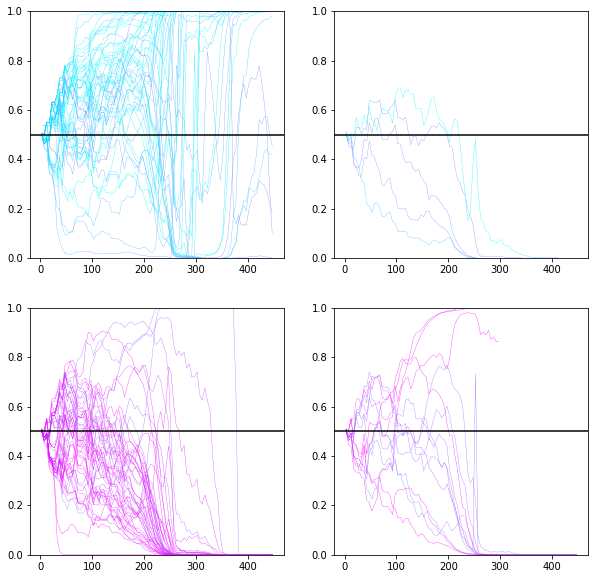

In [106]:
#f, ax = plt.subplots()
#for t, (start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
#    ax.plot(PI0_xx[start:stop],color=plt.cm.cool(trial_info['morphs'][t]),linewidth=.3)
    
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
f, ax = plt.subplots(2,2,figsize=[10,10])
for r in range(T.shape[0]):
    if effMorph[r]<=.5:
        if trial_info['rewards'][r]>0:
            ax[0,0].plot(centers,PI0_trial_mat[r,:],color=plt.cm.cool(effMorph[r]),linewidth=.3)
        else:
            ax[0,1].plot(centers,PI0_trial_mat[r,:],color=plt.cm.cool(effMorph[r]),linewidth=.3)
    else:
        if trial_info['rewards'][r]>0:
            ax[1,0].plot(centers,PI0_trial_mat[r,:],color=plt.cm.cool(effMorph[r]),linewidth=.3)
        else:
            ax[1,1].plot(centers,PI0_trial_mat[r,:],color=plt.cm.cool(effMorph[r]),linewidth=.3)
            
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axhline(.5,0,xmax=450,color='black')
        ax[i,j].set_ylim([0,1])
        
# ax.axhline(.5,0,xmax=450)
# ax.set_xlim([0,200])

In [104]:
T,occ,edges,centers= u.make_pos_bin_trial_matrices(LLR_XX,VRDat.pos._values,tstart_inds,teleport_inds)
#Td = u.trial_type_dict(T,trial_info['morphs'])

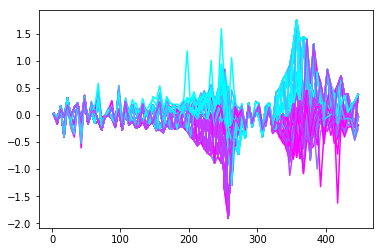

In [105]:
f, ax = plt.subplots()
for r in range(T.shape[0]):
    ax.plot(centers,T[r,:],color=plt.cm.cool(trial_info['morphs'][r]))

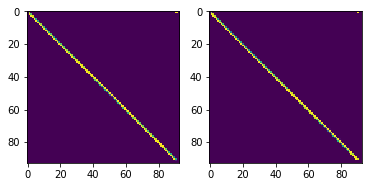

In [94]:
f,ax = plt.subplots(1,2)
ax[0].imshow(XX_I0[:100,:100],vmin=0,vmax=.5)
ax[1].imshow(XX_I1[:100,:100],vmin=0,vmax=.5)